<a href="https://colab.research.google.com/github/Pratham-Anand/My-Colaboratory/blob/main/kaggle_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv("train.csv")
data.head()
# data.isna()
# data.isnull().sum()
# data.describe()
print(data.isna().sum(axis=0))


In [ ]:
x=data.loc[ : ,data.columns!='target']
y=data.target
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=1.00,test_size=0,random_state = 0)
x_train=x
y_train=y


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p=[1,2]
# #convert to dictionary
# hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
# clf = GridSearchCV(knn, hyperparameters, cv=10)
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75,test_size=0.25,random_state = 0)
# best_model = clf.fit(x_train,y_train)
knn = KNeighborsClassifier(n_neighbors =325).fit(x_train, y_train)
  
# accuracy on X_test
# accuracy = knn.score(x_train, y_train)
# print(accuracy)
  
# creating a confusion matrix
# knn_predictions = knn.predict(x_test) 
# cm = confusion_matrix(y_test, knn_predictions)

In [ ]:
Y=pd.read_csv("test.csv")
Y_test=data.loc[ : ,  Y.columns!='id']

In [ ]:
predicted_knn=knn.predict(Y_test)
print(predicted_knn)

[3 3 3 ... 3 3 3]


In [ ]:
my_submission = pd.DataFrame({'id': Y.id, 'target': predicted_knn})
# you could use any filename. We choose submission here
my_submission.to_csv('knn.csv', index=False)

**SVM**


In [ ]:
from sklearn.svm import SVC
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,test_size=0.3,random_state = 0)
svmtrainx=x.iloc[:10000]
svmtrainy=y.iloc[:10000]
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(svmtrainx,svmtrainy)
svm_predictions = svm_model_linear.predict(Y_test)
print(svm_predictions)
  
# model accuracy for X_test  
# accuracy = svm_model_linear.score(x_test, y_test)
# print(accuracy)
  
# creating a confusion matrix
# cm = confusion_matrix(y_test, svm_predictions)
my_submission = pd.DataFrame({'id': Y.id, 'target': svm_predictions})
# # you could use any filename. We choose submission here
my_submission.to_csv('svm.csv', index=False)


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.99,test_size=0.01,random_state = 0)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

predicted_forest = classifier.predict(Y_test)
print(predicted_forest)

my_submission = pd.DataFrame({'id': Y.id, 'target': predicted_forest})
# you could use any filename. We choose submission here
my_submission.to_csv('randomforest.csv', index=False)

[2 4 3 ... 3 3 0]


**Decision Tree Classifier**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.99,test_size=0.01,random_state = 0)

# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth =2).fit(x_train, y_train)
predicted_dtree = dtree_model.predict(Y_test) 
print(predicted_dtree)
# creating a confusion matrix
final_submission=pd.DataFrame({"id":Y.id,"target":predicted_dtree})
final_submission.to_csv('dtree.csv', index=False)

**Navye bayes**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.99,test_size=0.01, random_state=1)
  
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
  
# making predictions on the testing set
predicted_bayes = gnb.predict(Y_test)
print(predicted_bayes)

final_submission=pd.DataFrame({"id":Y.id,"target":predicted_bayes})
final_submission.to_csv('navyebase.csv', index=False)
# comparing actual response values (y_test) with predicted response values (y_pred)
# from sklearn import metrics
# print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

**Parameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
svmtrainx=x.iloc[:10000]
svmtrainy=y.iloc[:10000]
rf_random.fit(svmtrainx,svmtrainy)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


**Ensembling**


In [ ]:
# finaldf=pd.DataFrame({"KNN":predicted_knn,"Random Forest":predicted_forest,"SVM":svm_predictions,"Dtree":predicted_dtree})
# # print(finaldf)
# finalarray = finaldf.to_numpy()
# # print(finalarray)
# from scipy import stats
# # for i in range(len(finaldf)):
# #   if(finaldf.loc[i,"KNN"]==finaldf.loc[i,"Random Forest"] or finaldf.loc[i,"KNN"]==finaldf.loc[i,"SVM"] or finaldf.loc[i,"SVM"]==finaldf.loc[i,"Random Forest"]) :
# #     finaltarget[i][0]=(stats.mode(finalarray[i],axis=1)[0]) 
# #   else :
# #     finaltarget[i][0]=3




 
# print(finaltarget)
# # finaldf['finaltarget']=finaltarget


# # final_submission=pd.DataFrame({"id":Y.id,"target":finaldf.finaltarget})
# # final_submission.to_csv('kaggle.csv', index=False)


**value of k**

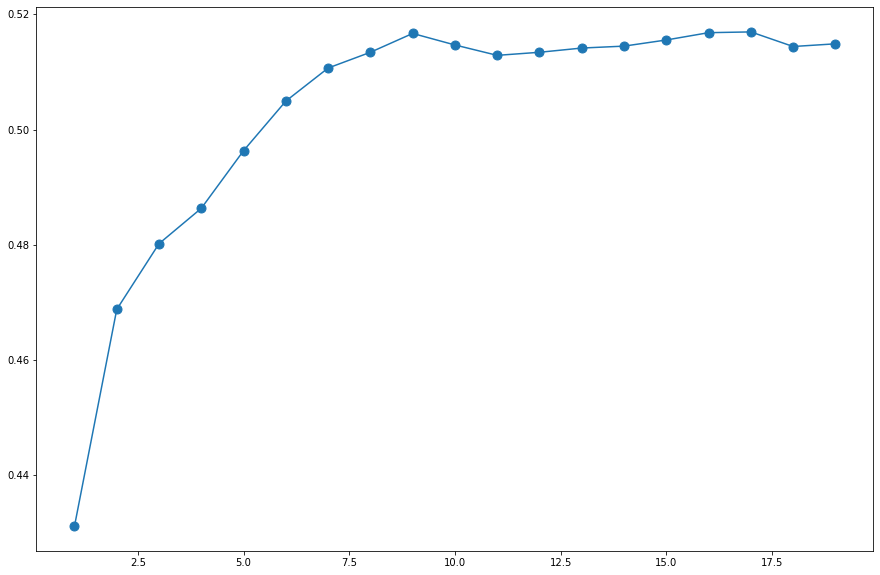

In [ ]:
# error_rate = []
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7,test_size=0.3,random_state = 0)

# for i in range(1,20):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train, y_train)
#     pred = knn.predict(x_test)
#     error_rate.append(np.mean(pred != y_test))

# plt.figure(figsize=(15,10))
# plt.plot(range(1,20),error_rate, marker='o', markersize=9)